# 0. Import Library

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

![](https://cdn.smartkarrot.com/wp-content/uploads/2020/04/Customer-segmentation-matrix.png.webp)

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## 2.2 Data Cleaning

### - Missing Value

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### - Inconsistent Data

In [8]:
df.groupby('Genre')['Genre'].count()

Genre
Female    112
Male       88
Name: Genre, dtype: int64

### - Outliers

## 2.3 Data Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

In [11]:
columns = ['Genre']
enc_columns, lb=labelEncode(df, columns)

In [12]:
df.sample(15)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded
25,26,Male,29,28,82,1
103,104,Male,26,62,55,1
169,170,Male,32,87,63,1
69,70,Female,32,48,47,0
173,174,Male,36,87,92,1
155,156,Female,27,78,89,0
86,87,Female,55,57,58,0
151,152,Male,39,78,88,1
53,54,Male,59,43,60,1
124,125,Female,23,70,29,0


In [13]:
for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('  -------')

Genre
  ['Male' 'Female']
  [1 0]
  -------


## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [14]:
#ไม่ต้อง Export
#df.to_csv('รหัสนักศึกษา.csv',index=False)

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [35]:
df = df.drop(['Genre'],axis=1)
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded,Cluster
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400,-0.605143
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867,-0.271799
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410,-0.599940
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109,0.475026
Genre_Encoded,0.057400,0.060867,0.056410,-0.058109,1.000000,-0.058219
Cluster,-0.605143,-0.271799,-0.599940,0.475026,-0.058219,1.000000


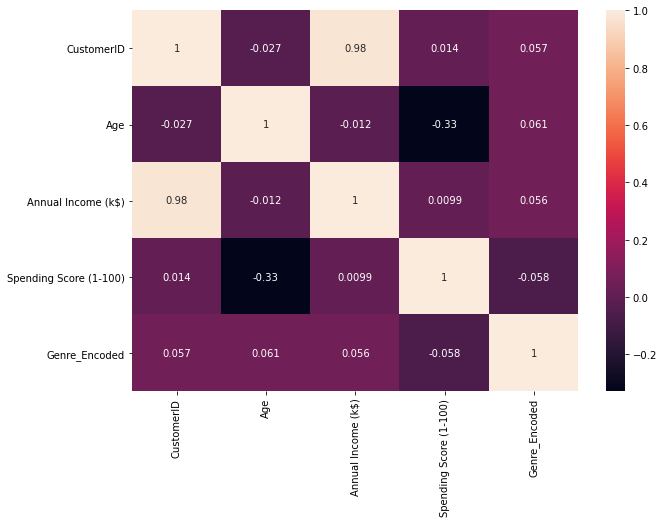

In [16]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.5 การกำหนด Feature

In [37]:
X=df.iloc[:, [3,4]].values
X

array([[39,  1],
       [81,  1],
       [ 6,  0],
       [77,  0],
       [40,  0],
       [76,  0],
       [ 6,  0],
       [94,  0],
       [ 3,  1],
       [72,  0],
       [14,  1],
       [99,  0],
       [15,  0],
       [77,  0],
       [13,  1],
       [79,  1],
       [35,  0],
       [66,  1],
       [29,  1],
       [98,  0],
       [35,  1],
       [73,  1],
       [ 5,  0],
       [73,  1],
       [14,  0],
       [82,  1],
       [32,  0],
       [61,  1],
       [31,  0],
       [87,  0],
       [ 4,  1],
       [73,  0],
       [ 4,  1],
       [92,  1],
       [14,  0],
       [81,  0],
       [17,  0],
       [73,  0],
       [26,  0],
       [75,  0],
       [35,  0],
       [92,  1],
       [36,  1],
       [61,  0],
       [28,  0],
       [65,  0],
       [55,  0],
       [47,  0],
       [42,  0],
       [42,  0],
       [52,  0],
       [60,  1],
       [54,  0],
       [60,  1],
       [45,  0],
       [41,  1],
       [50,  0],
       [46,  1],
       [51,  0

# 3. Modelling: k-Means

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/124px-K_Means_Example_Step_1.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/139px-K_Means_Example_Step_2.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/139px-K_Means_Example_Step_3.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/139px-K_Means_Example_Step_4.svg.png)

In [18]:
from sklearn.cluster import KMeans

## 3.1 Clustering Data

In [19]:
model = KMeans(n_clusters=5, max_iter=200)

In [20]:
model.fit(X)

KMeans(max_iter=200, n_clusters=5)

## 3.2 Predict Data

In [21]:
y_kmeans = model.fit_predict(X)

In [22]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [23]:
df["Cluster"]=y_kmeans

In [24]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded,Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [25]:
df[df["Cluster"]==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Encoded,Cluster
124,125,Female,23,70,29,0,0
128,129,Male,59,71,11,1,0
130,131,Male,47,71,9,1,0
134,135,Male,20,73,5,1,0
136,137,Female,44,73,7,0,0
138,139,Male,19,74,10,1,0
140,141,Female,57,75,5,0,0
144,145,Male,25,77,12,1,0
146,147,Male,48,77,36,1,0
148,149,Female,34,78,22,0,0


In [26]:
df['Cluster'].value_counts()

1    81
2    39
0    35
3    23
4    22
Name: Cluster, dtype: int64

In [27]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

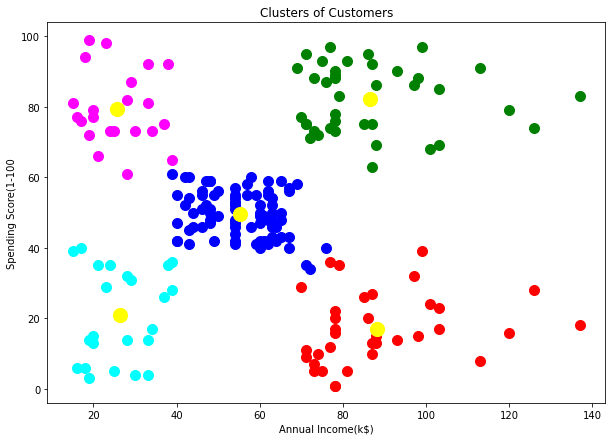

In [28]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

# 4. Model Evaluation

## 4.1 Silhouette Score 

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.553931997444648


## 4.2 Davies-Bouldin Index

In [31]:
from sklearn.metrics import davies_bouldin_score

In [32]:
davies_bouldin_idx = davies_bouldin_score(X, y_kmeans)
print("The Davies-Bouldin index is:", davies_bouldin_idx)

The Davies-Bouldin index is: 0.5725628995597086


# [Optional] Save Machine Learning Models

In [33]:
#import pickle
#filename = 'pickle_รหัสนศ.sav'
#pickle.dump(model, open(filename, 'wb'))